In [1]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import time, datetime, sys

Using TensorFlow backend.


In [2]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128 #number of samples per gradient update
EPOCHS = 6 #epoch is an iteration over the entre x and y data provided
WEIGHTS_FILE = open("MNIST_WEIGHTS.txt","w+")
WEIGHTS_IMAGES_DIR = "MNIST_WEIGHT_MAPS/"

In [3]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train images:',X_train)
    print('Test images:',X_test)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [4]:
"""Load and prepare data"""
# Load data
# X's are 28x28 grayscale images, elements 0-255
# Y's are labels
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data from 2 dimensional image to 1 dimensional sequence
#first line in a pair turns to 1 dimensional
#second number puts it from [0-255] to a float [0,1]
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
# Converts base 10 number into index is list of 10, ie 2 = [0.,1.,0.,....0.]
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
"""Build and train neural network"""
# Build neural network
model = models.Sequential()
#model.add(Dense(512,activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
#model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train model
print(X_train.shape, y_train.shape)
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

(60000, 784) (60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 1s 11us/step - loss: 0.5966 - acc: 0.8512 - val_loss: 0.3421 - val_acc: 0.9073
Epoch 2/6
60000/60000 [==============================] - 1s 9us/step - loss: 0.3308 - acc: 0.9080 - val_loss: 0.2987 - val_acc: 0.9165
Epoch 3/6
60000/60000 [==============================] - 0s 8us/step - loss: 0.3019 - acc: 0.9156 - val_loss: 0.2851 - val_acc: 0.9213
Epoch 4/6
60000/60000 [==============================] - 0s 8us/step - loss: 0.2885 - acc: 0.9196 - val_loss: 0.2778 - val_acc: 0.9235
Epoch 5/6
60000/60000 [==============================] - 0s 8us/step - loss: 0.2805 - acc: 0.9217 - val_loss: 0.2734 - val_acc: 0.9238
Epoch 6/6
60000/60000 [==============================] - 0s 8us/step - loss: 0.2747 - acc: 0.9237 - val_loss: 0.2731 - val_acc: 0.9241


In [7]:
# Prints weights to file
print()
for i in range(len(model.layers)):
    print("Printing weights for layer "+str(i+1)+"/"+str(len(model.layers))+"                                       ",end="\r")
    print("Layer "+str(i)+":",file=WEIGHTS_FILE)
    print("Weights "+"("+str(len(model.layers[i].get_weights()[0]))+"x"+str(len(model.layers[i].get_weights()[0][0]))+"):\n",model.layers[i].get_weights()[0],file=WEIGHTS_FILE)
    print("Bias (1x"+str(len(model.layers[i].get_weights()[1]))+"):\n",model.layers[i].get_weights()[1],file=WEIGHTS_FILE)

In [8]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

"""Summarize and visualize the model"""
# Summary of neural network
model.summary()

10000/10000 [==============================] - 0s 9us/step
Test loss: 0.2731488221526146
Test accuracy: 0.9241
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


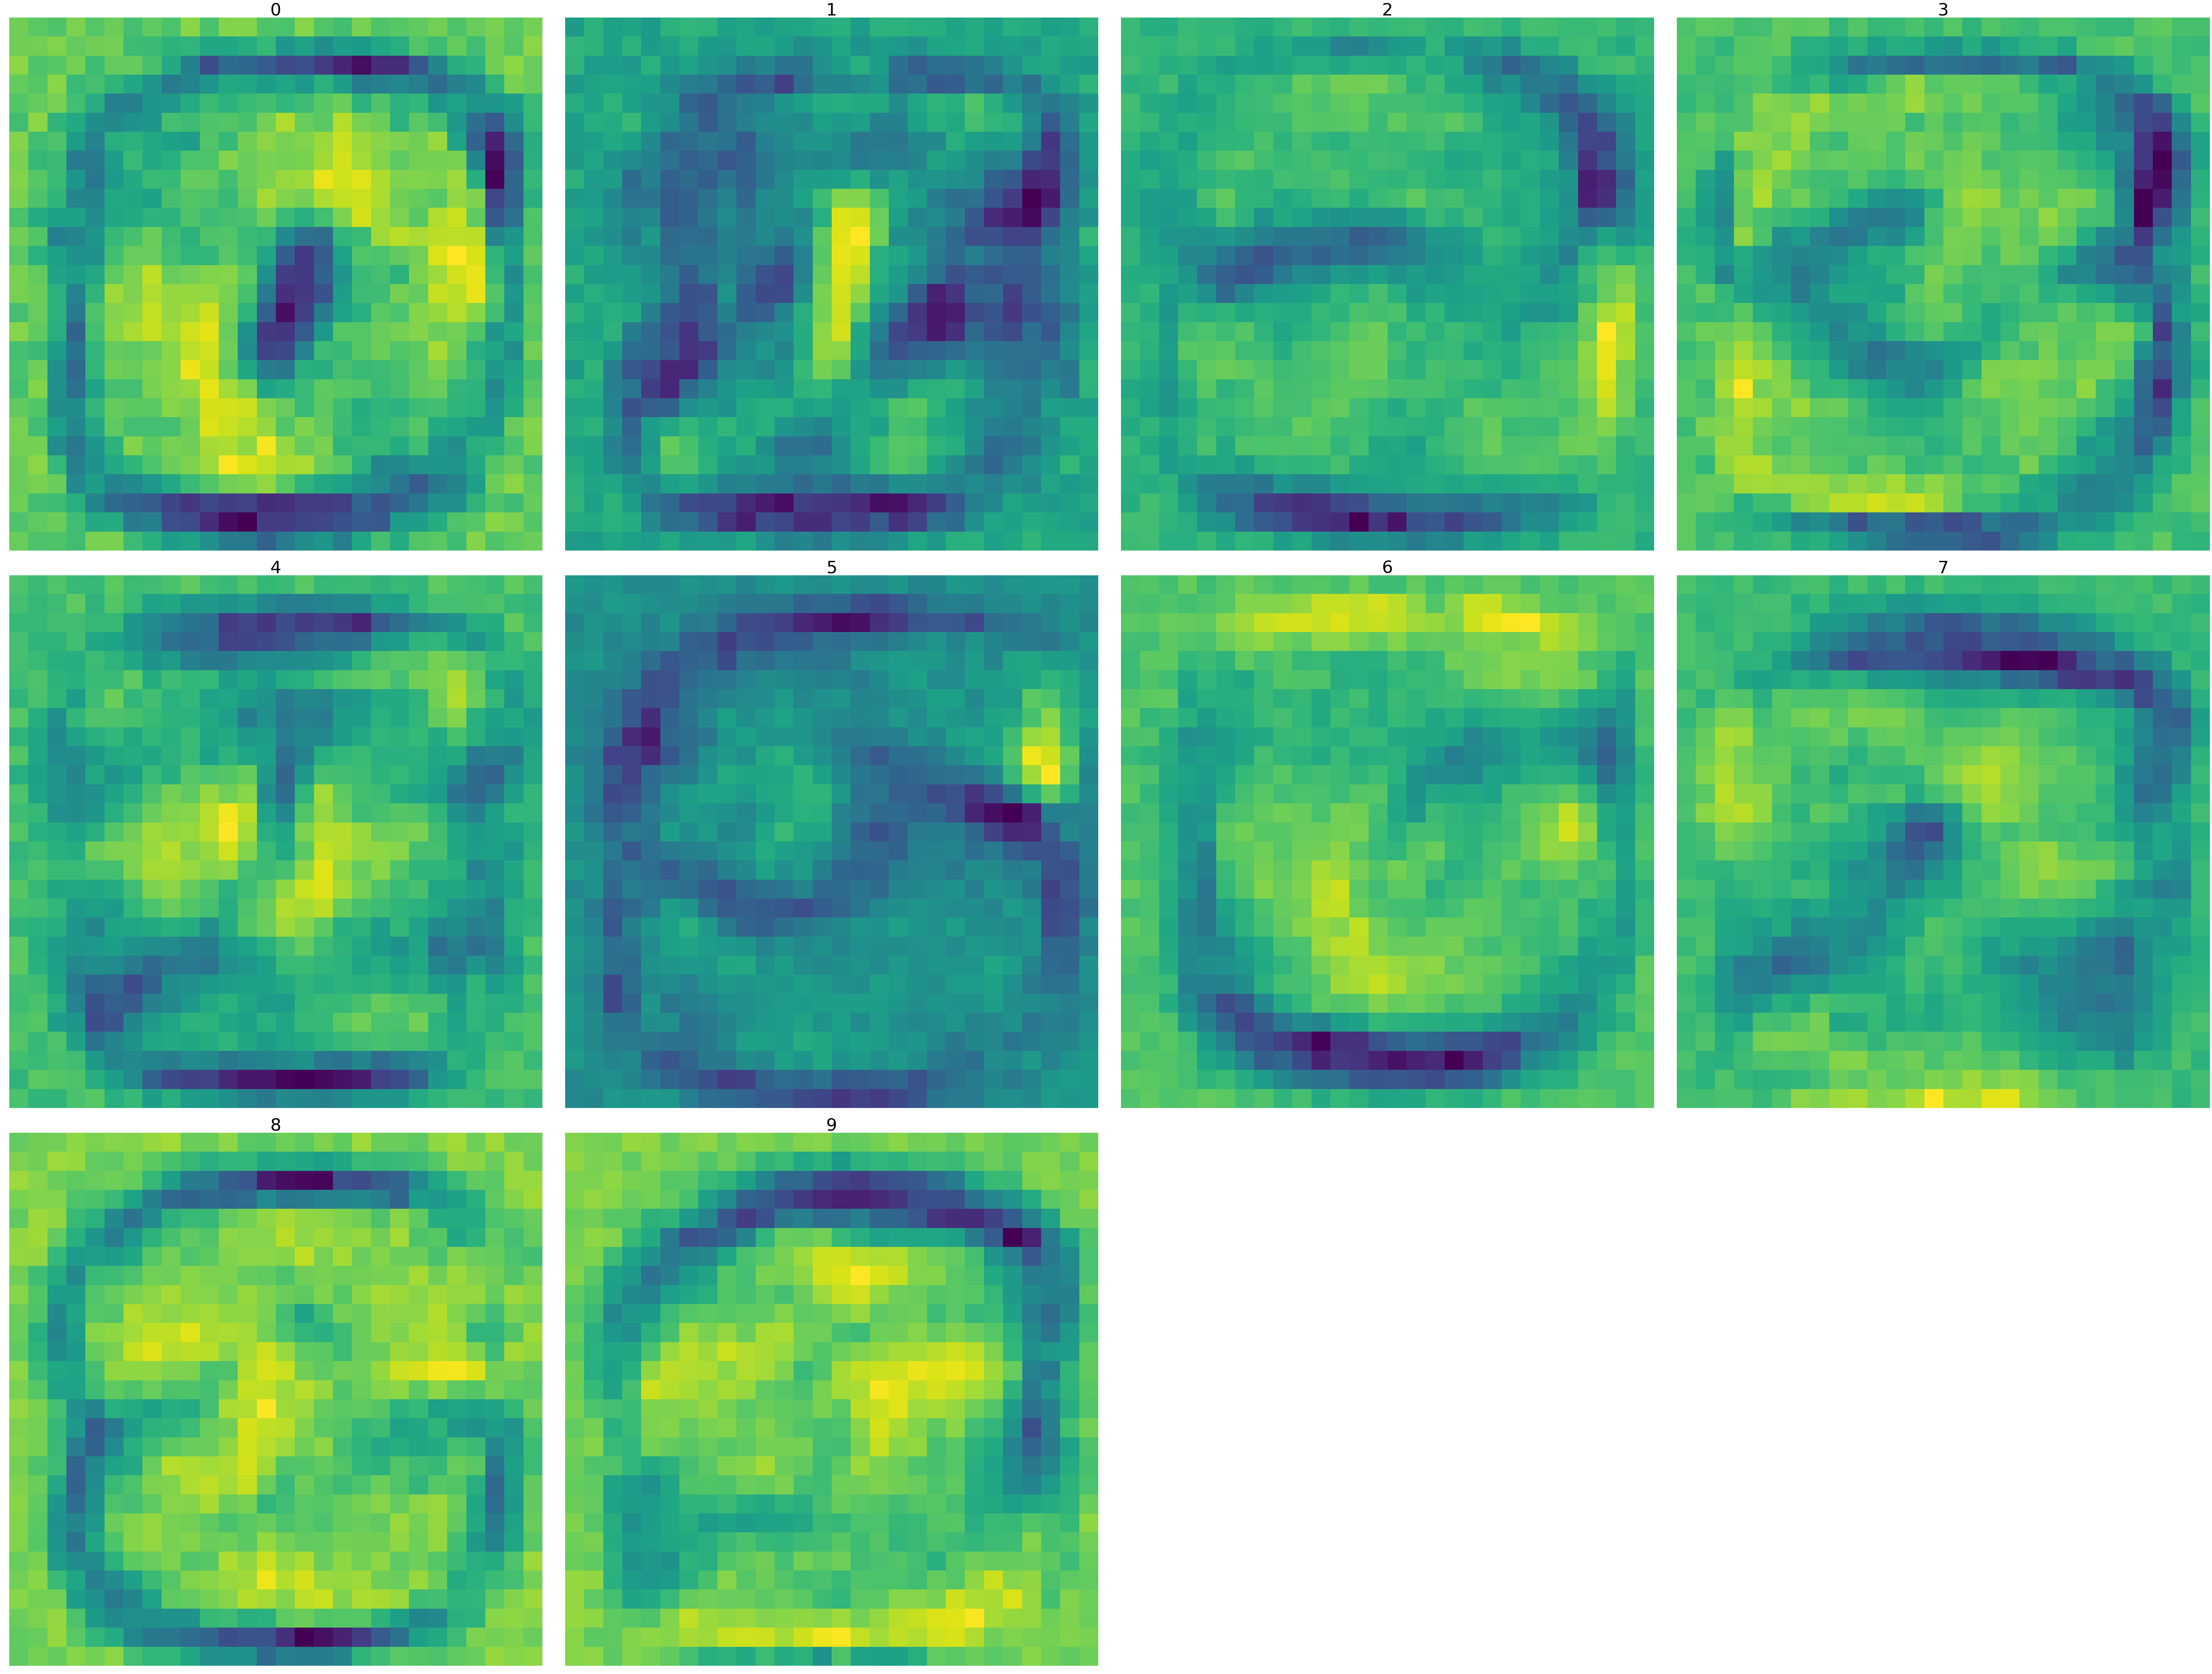

In [9]:
# list of images we'll calculate
images = []
# 512x784 numpy array of images
layer_0_images = (model.layers[0].get_weights()[0]+model.layers[0].get_weights()[1]).T
#generates matplotlib figure of size 90x90
fig = plt.figure(figsize=(90,90))
# length is amount of nodes in hidden layer 1
length = len(layer_0_images)
# to arrange node visualization, we frame it in a square grid of images,
#each side being sqrt(length) + 1 to assure each image can fit
size = sqrt(length)+1
#iterates over each node
for i in range(length):
    #converts from (784,) to (28,28) and normalizes values
    layer_0_images[i] -= layer_0_images[i].min()
    layer_0_images[i] *= 255.0/layer_0_images[i].max()
    layer_0_images[i] = layer_0_images[i].astype(int)
    images.append([])
    for j in range(0,784,28):
        images[i].append(np.array(layer_0_images[i][j:j+28]))
    # adds a subplot to figure
    a=fig.add_subplot(size,size,i+1)
    # displays image on figure
    plt.imshow(images[i], interpolation='nearest')
    # sets title of image to node #
    a.set_title(str(i),size=50)
    # hides axis labels 
    plt.axis("off")
# alighns images nicely
plt.tight_layout()
# saves figure to png
plt.savefig(WEIGHTS_IMAGES_DIR+"Layer 0.png")

ValueError: num must be 1 <= num <= 9, not 10

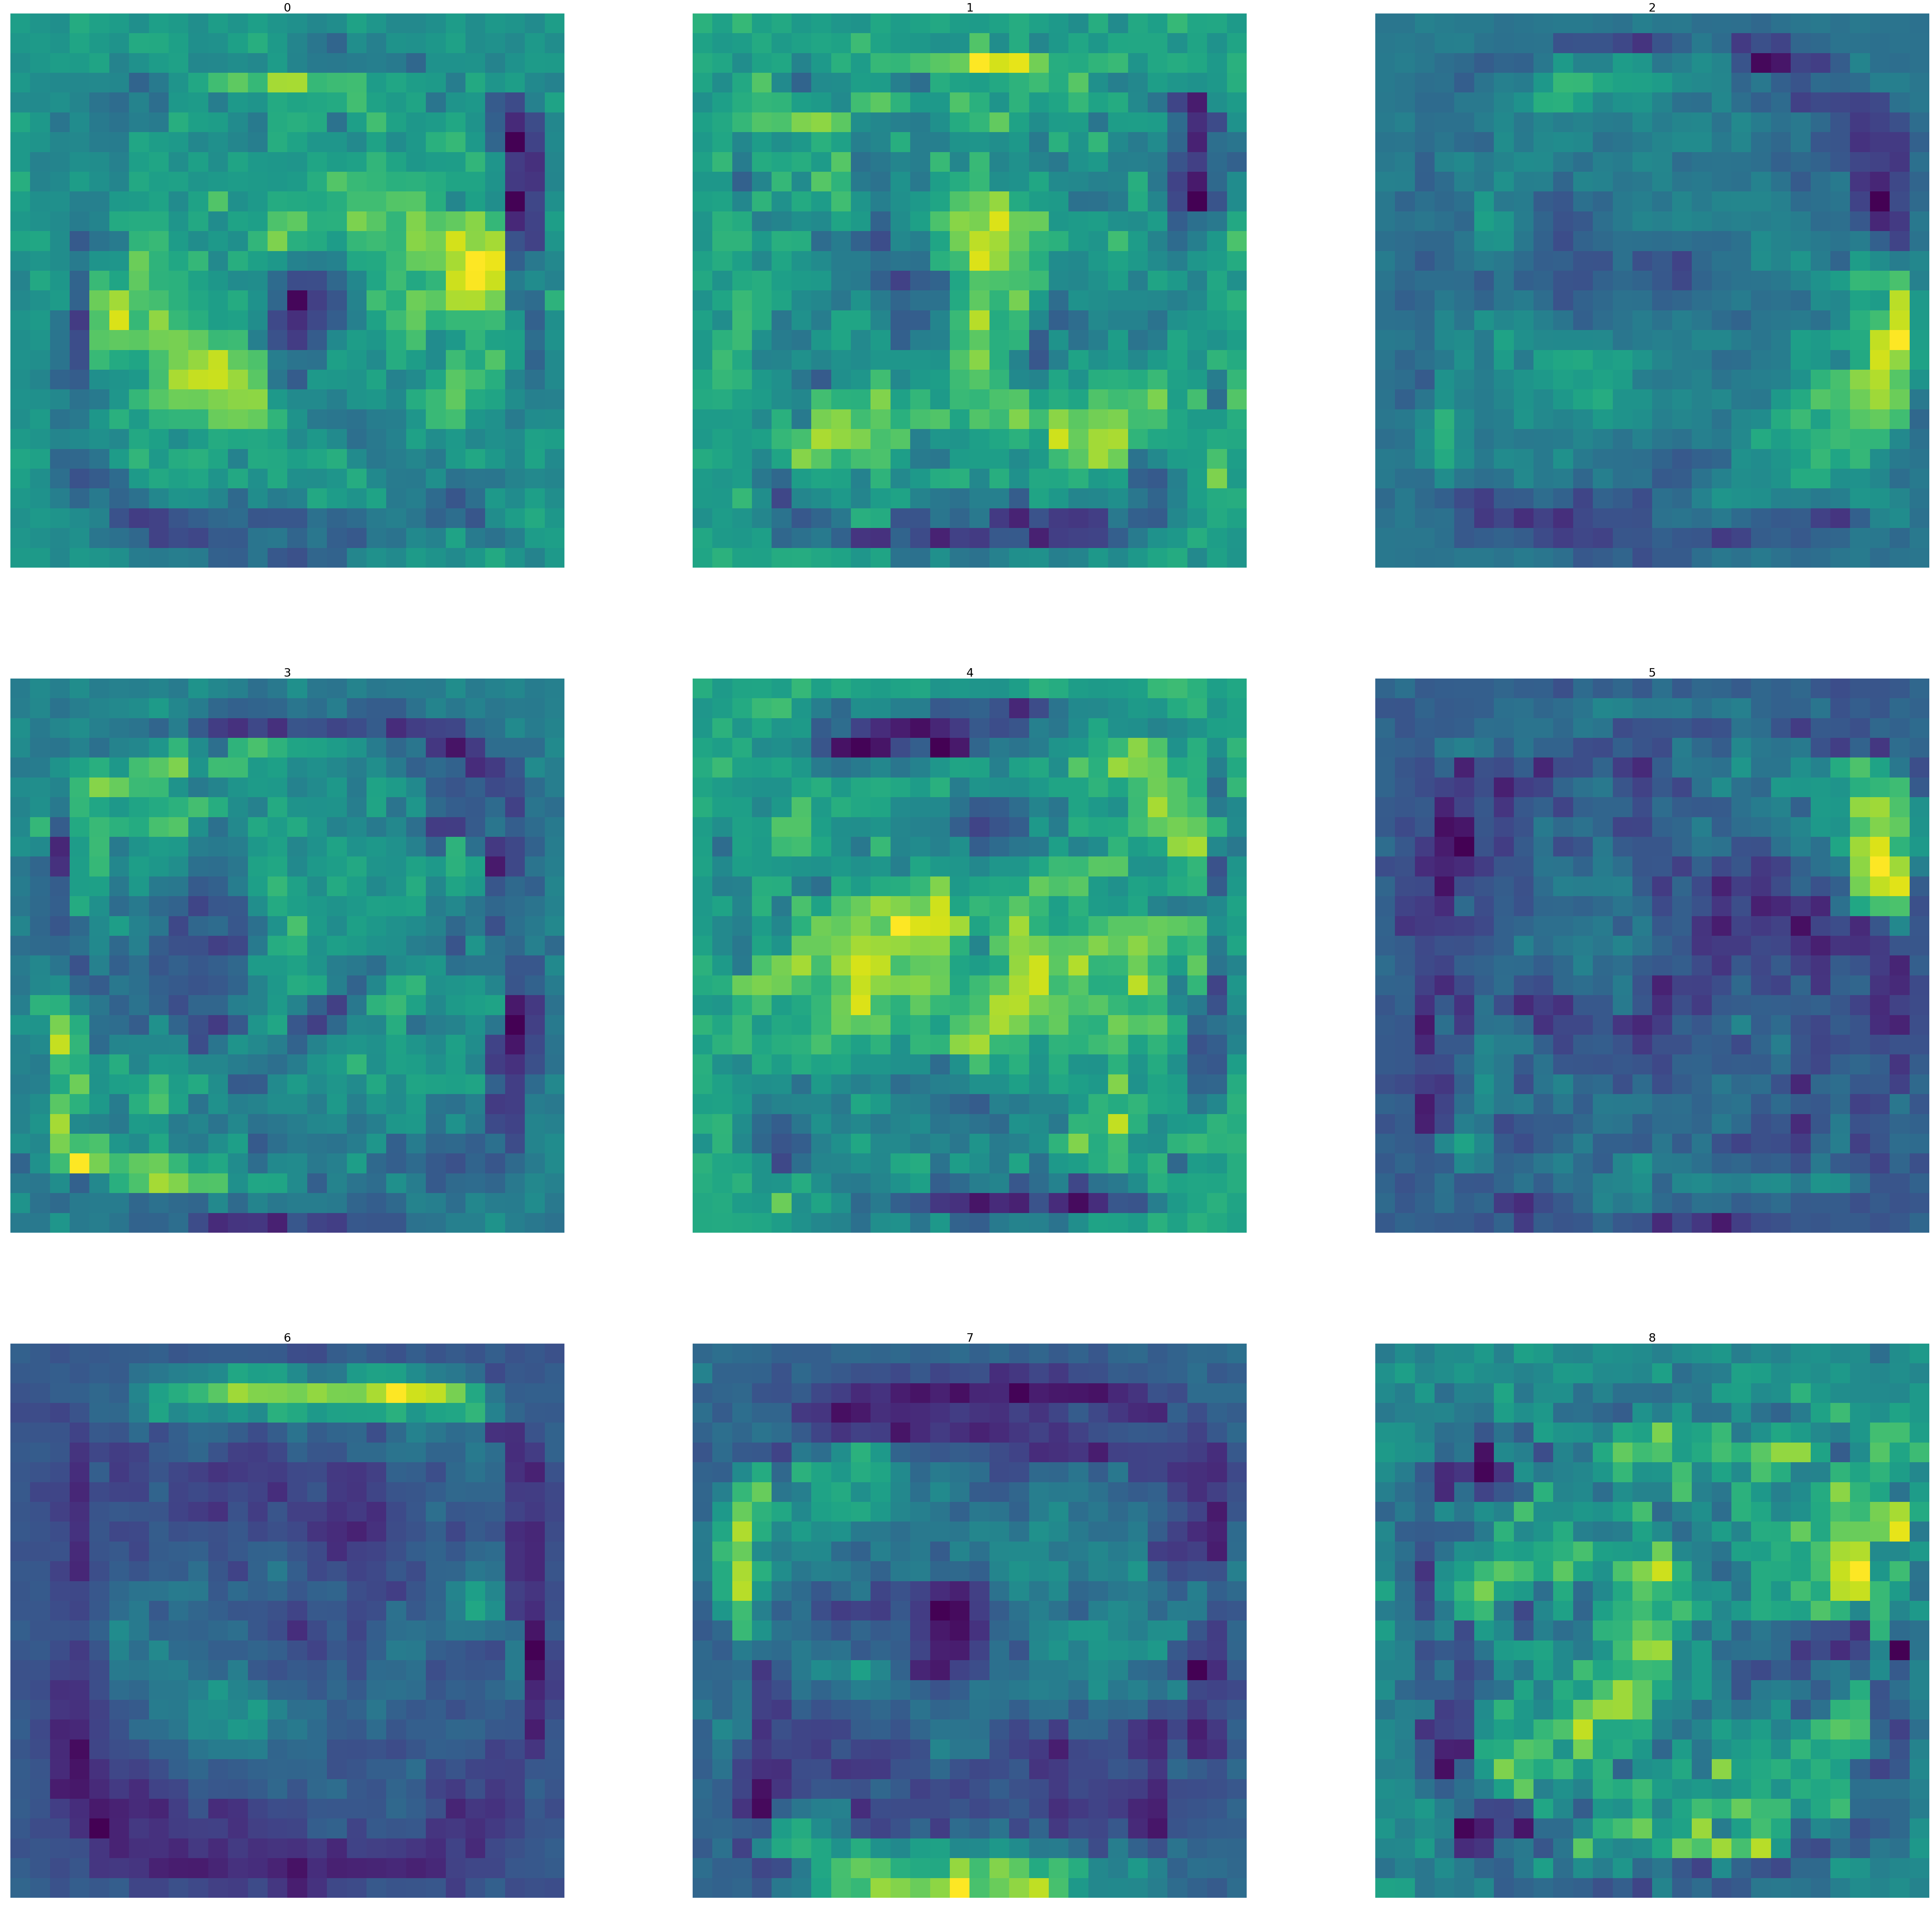

In [16]:
images = []
'''
layer0: 784x512
layer1: 512x256
layer2: 256x10
'''
layer_1_images = np.dot(layer_0_images.T,
                               model.layers[1].get_weights()[0]+model.layers[1].get_weights()[1]).T

#(256x784)
images=[]
fig = plt.figure(figsize=(60,60))
length = len(layer_1_images)
size = sqrt(length)
print()
for i in range(length):
    print("Calculating Layer 1 Node",i,"                   ",end="\r")
    #Normalizes image data to be between 0-1 respective to max and mins
    #layer_1_images[i].astype(int)
    layer_1_images[i] -= layer_1_images[i].min()
    layer_1_images[i] *= 255.0/layer_1_images[i].max()
    layer_1_images[i] = layer_1_images[i].astype(int)
    #converts from (784,) to (28,28)
    images.append([])
    for j in range(0,784,28):
        images[i].append(np.array(layer_1_images[i][j:j+28]))
    #adds to figure
    a=fig.add_subplot(size,size,i+1)
    plt.imshow(images[i], interpolation='nearest')
    a.set_title(str(i),size=30)
    plt.axis("off")
plt.tight_layout()
plt.savefig(WEIGHTS_IMAGES_DIR+"Layer 1.png")
#plt.show()

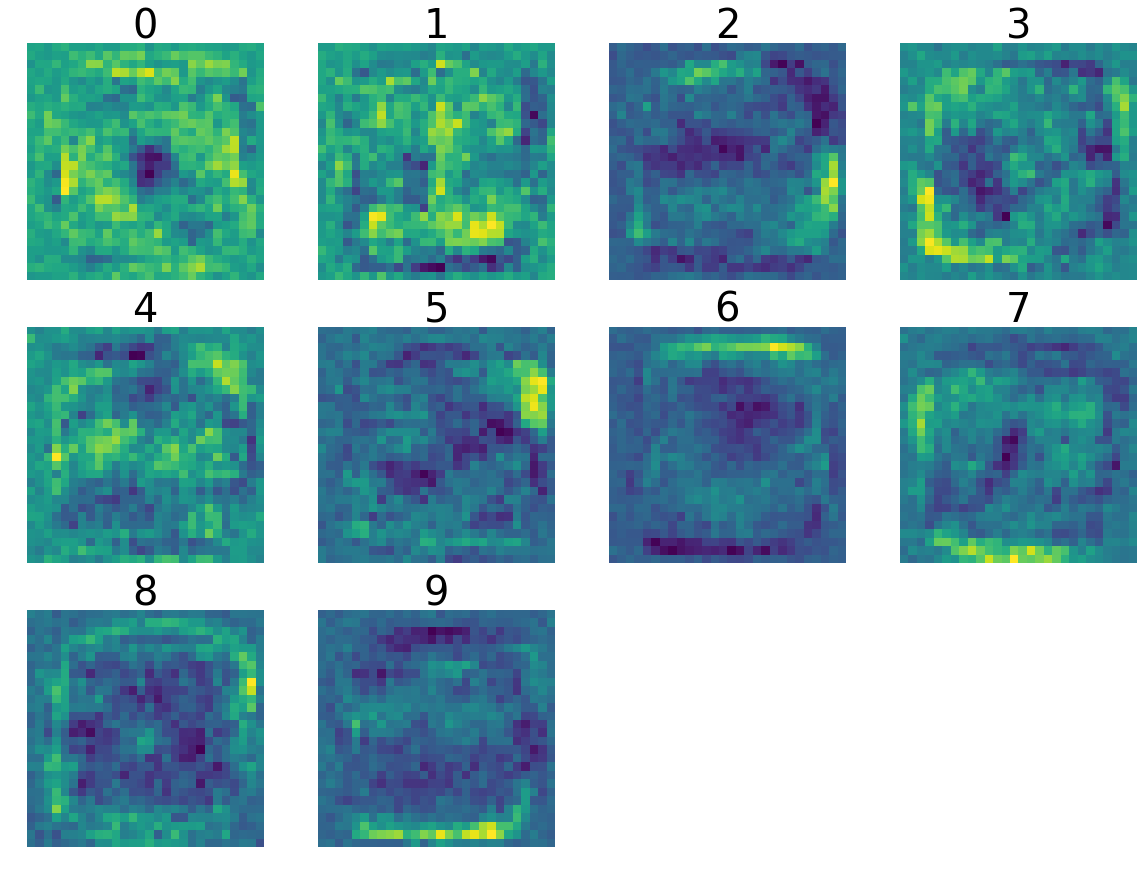

In [12]:
'''images = []
layer0: 784x512
layer1: 512x256
layer2: 256x10
layer_2_images = np.dot(layer_1_images.T,model.layers[2].get_weights()[0] +model.layers[2].get_weights()[1]).T

#(10x784)
images=[]
fig = plt.figure(figsize=(20,20))
for i in range(len(layer_2_images)):
    print("Calculating Layer 2 Node",i,"                   ",end="\r")
    #Normalizes image data to be between 0-1 respective to max and mins
    #layer_2_images[i].astype(int)
    layer_2_images[i] -= layer_2_images[i].min()
    layer_2_images[i] *= 255.0/layer_2_images[i].max()
    layer_2_images[i] = layer_2_images[i].astype(int)
    #converts from (784,) to (28,28)
    images.append([])
    for j in range(0,784,28):
        images[i].append(np.array(layer_2_images[i][j:j+28]))
    #adds to figure
    a=fig.add_subplot(4,4,i+1)
    plt.imshow(images[i], interpolation='nearest')
    a.set_title(str(i),size=40)
    plt.axis("off")
#plt.tight_layout()
plt.savefig(WEIGHTS_IMAGES_DIR+"Layer 2.png")
plt.show()'''